### 1. Define a simple Feed Forward Neural Net

In [1]:
from autograd_mini.tensor import Tensor
 
class MNISTNet:
    
    def __init__(self):
        self.W1 = Tensor(shape=(784, 256), init_method="kaiming")
        self.W2 = Tensor(shape=(256, 10), init_method="kaiming")

    def params(self):
        return [self.W1, self.W2]

    def __call__(self, x):
        x = Tensor(x) if not isinstance(x,Tensor) else x
        x = x.dot(self.W1)
        x = x.relu()
        x = x.dot(self.W2)
        x = x.log_softmax()
        return x


### 2. Train the Neural Net on MNIST

In [2]:
import tensorflow as tf # Used only for loading MNIST
import numpy as np
from matplotlib import pyplot as plt
from autograd_mini.data import Dataset, DataLoader
from autograd_mini.optim import Optim as SGD

N_EPOCHS = 10

# Load the data (using TF for convenience)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten 
x_train_flatten = x_train.reshape(-1,784) 
x_test_flatten = x_test.reshape(-1,784) 

# Create data loader for easy shuffle and batch splitting
train_dataset = Dataset(x_train_flatten, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Init the Model and optimizer
model = MNISTNet()
optim = SGD(lr = 0.001, params = model.params())

# Training Loop
epoch_losses = []
for epoch in range(N_EPOCHS):
    losses = []
    # Training Loss
    for Xb, yb in train_dataloader:
        out = model(Xb)
        loss = out.nll_loss(yb)
        loss.backward()
        optim.step()
        optim.zero_grad()
        losses.append(loss.data)
        
    epoch_losses.append(np.mean(losses))

### 3. Visualize Training Loss over the Epochs

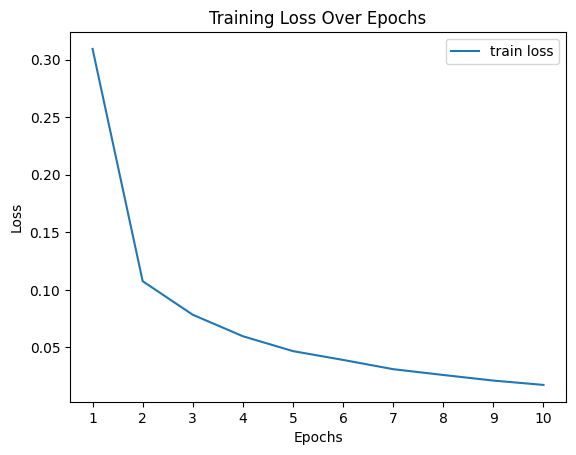

In [3]:
plt.plot(epoch_losses, label="train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.xticks(range(N_EPOCHS), range(1, N_EPOCHS + 1))
plt.legend()
plt.show()

### 4. Test Accuracy

In [4]:
out = model(x_test_flatten)
predictions = out.data.argmax(axis=1)
(predictions == y_test).mean()

0.9777

### 5. Visualize examples where the model makes errors

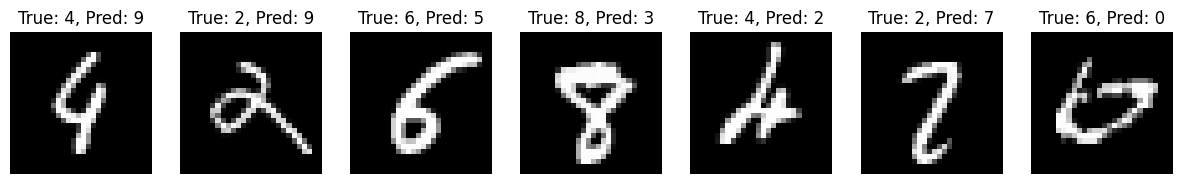

In [5]:
error_indices = np.where(predictions != y_test)[0]

def visualize_errors(x_test, y_test, error_indices, num_samples=10):
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    for i, idx in enumerate(error_indices[:num_samples]):
        img = x_test[idx].reshape(28, 28)
        true_label = y_test[idx]
        pred_label = predictions[idx]
        
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'True: {true_label}, Pred: {pred_label}')
        axes[i].axis('off')

# Visualize some incorrect predictions
visualize_errors(x_test_flatten, y_test, error_indices, num_samples=7)